<a href="https://colab.research.google.com/github/manuelncsu/Bacterial-WGS-bioinformatics-workshop/blob/main/Day%202/Bioinformatics_course_Day_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

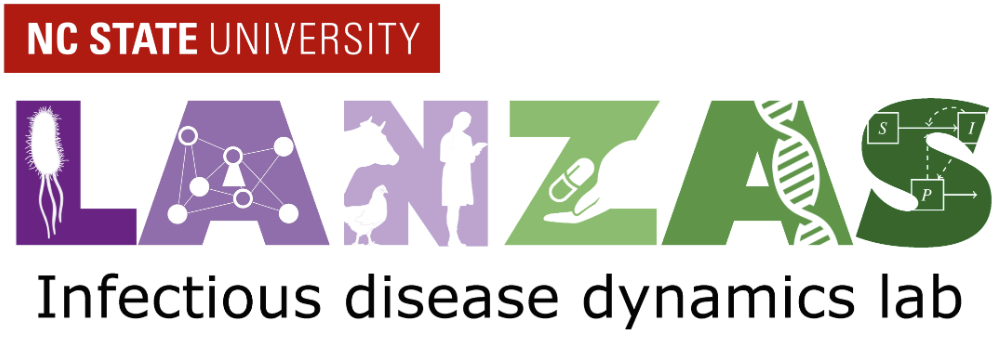

# **Bacterial WGS bioinformatics workshop**
## **Day 2 - Part 1.** Downloading and processing WGS using Bactopia pipeline

##**Step 1:** Mounting your google drive into google colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


##Lets go to the workshop main folder

In [ ]:
cd /content/gdrive/Shareddrives/Workshop Manuel & Alba/Day_2

/content/gdrive/Shareddrives/Workshop Manuel & Alba/Day_2


##Install Conda

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

## Lets create a virtual environment

In [ ]:
!python --version

Python 3.10.10


In [ ]:
# install virtual environment package
!pip install virtualenv

In [ ]:
# create virtual environment
!virtualenv bactopia

In [25]:
# Lets check our new virtual environment
!ls

bin  lib  pyvenv.cfg


In [23]:
#Activate the environment
!source bactopia/bin/activate

In [24]:
cd bactopia

/content/bactopia


## Install Mamba inside our virtual environment

In [ ]:
# Install Mamba
!conda install -c conda-forge mamba -y

## Lets install Bactopia

In [30]:
ls

bin/  lib/  pyvenv.cfg  SRA_sequences_subsample.txt


In [ ]:
!mamba install -c rpetit3 -c conda-forge -c bioconda bactopia

In [29]:
!which bactopia

/usr/local/bin/bactopia


## Search metadata using Bactopia

### You will have to manually upload the SRA_sequences_subsample.txt file into your bactopia folder using the upload buton

### Start by uploading the list of sequences we generated yesterday

In [31]:
!bactopia search --query SRA_sequences_subsample.txt

2024-02-02 02:06:55 INFO     2024-02-02 02:06:55:root:INFO - Submitting query (type -  ]8;id=230032;file:///usr/local/lib/python3.10/site-packages/bactopia/cli/search.py\search.py]8;;\:]8;id=263076;file:///usr/local/lib/python3.10/site-packages/bactopia/cli/search.py#472\472]8;;\
                             run_accession)                                                         
2024-02-02 02:06:56 INFO     2024-02-02 02:06:56:root:INFO - Writing results to        ]8;id=968728;file:///usr/local/lib/python3.10/site-packages/bactopia/cli/search.py\search.py]8;;\:]8;id=562480;file:///usr/local/lib/python3.10/site-packages/bactopia/cli/search.py#554\554]8;;\
                             ./bactopia-metadata.txt                                                
                    INFO     2024-02-02 02:06:56:root:INFO - Writing accessions to     ]8;id=673843;file:///usr/local/lib/python3.10/site-packages/bactopia/cli/search.py\search.py]8;;\:]8;id=702465;file:///usr/local

# Lets check each of the generated files

## Metadata file

In [32]:
import pandas as pd

# Add the path to your file
file_path = 'bactopia-metadata.txt'

# Read the entire file into a Pandas DataFrame
df = pd.read_csv(file_path, sep='\t')

# Load the data_table extension for interactive display
%load_ext google.colab.data_table

# Display the DataFrame
df

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,run_accession,experiment_title,sample_accession,submission_accession,library_selection,last_updated,sra_bytes,fastq_bytes,instrument_platform,sra_aspera,...,strain,experiment_accession,scientific_name,tax_id,study_accession,accession,secondary_sample_accession,first_public,study_alias,isolation_source
0,SRR4300580,Illumina MiSeq sequencing: WGS of Clostridium ...,SAMN05832947,SRA480763,RANDOM,2016-10-05,316789107,165442495;214863880,ILLUMINA,fasp.sra.ebi.ac.uk:/vol1/srr/SRR430/000/SRR430...,...,127A5,SRX2195088,Clostridioides difficile,1496,PRJNA344770,SRR4300580,SRS1717253,2016-10-05,PRJNA344770,stool
1,SRR4300579,Illumina MiSeq sequencing: WGS of Clostridium ...,SAMN05832946,SRA480763,RANDOM,2016-10-05,695413420,384579817;460952601,ILLUMINA,fasp.sra.ebi.ac.uk:/vol1/srr/SRR430/009/SRR430...,...,127A2,SRX2195087,Clostridioides difficile,1496,PRJNA344770,SRR4300579,SRS1717252,2016-10-05,PRJNA344770,stool


## Bactopia accessions file - This file will be used for further analysis

In [33]:
import pandas as pd

# Add the path to your file
file_path = 'bactopia-accessions.txt'

# Read the entire file into a Pandas DataFrame
df = pd.read_csv(file_path, sep='\t')

# Load the data_table extension for interactive display
%load_ext google.colab.data_table

# Display the DataFrame
df

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,accession,runtype,species,genome_size
0,SRX2195087,illumina,Clostridioides difficile,3605000
1,SRX2195088,illumina,Clostridioides difficile,3605000


## Lets run Bactopia pipeline

In [ ]:
!bactopia --accessions bactopia-accessions.txt --outdir ./Bactopia_results/ --cleanup_workdir --cpus 8

2024-02-02 02:07:58 INFO     2024-02-02 02:07:58:root:INFO - Checking if environment ]8;id=415376;file:///usr/local/lib/python3.10/site-packages/bactopia/cli/download.py\download.py]8;;\:]8;id=605780;file:///usr/local/lib/python3.10/site-packages/bactopia/cli/download.py#544\544]8;;\
                             pre-builds are needed (this may take a while if                        
                             building for the first time)                                           
N E X T F L O W  ~  version 23.10.1
Launching `/usr/local/share/bactopia-3.0.1/main.nf` [ridiculous_meninsky] DSL2 - revision: 0cd9f79ba7
WARN: Maximum memory (32) was adjusted to fit your system (12)
WARN: Maximum CPUs (4) was adjusted to fit your system (2)

WARN: Found unexpected parameters:
* --cpus: 8
- Ignore this warning: params.schema_ignore_params = "cpus" 



---------------------------------------------
   _                _              _             
  | |__   __ _  ___| |_ ___  _ __ (_)

##Now if the sequences comes from Oxford Nanopore Technologies (ONT), we use the following command

In [ ]:
bactopia --ont --accessions bactopia-accessions.txt --outdir ./pepe/ --cleanup_workdir

# Finally, this code will be useful to quickly remove a non-empty directory

In [20]:
import shutil

# Replace 'your_directory' with the actual path of the directory you want to delete
directory_path = 'bactopia'

# Delete the directory and its contents
shutil.rmtree(directory_path)